# IMPORTS

In [1]:
import torch
import torch.nn as nn
from pymonntorch import Behavior, SynapseGroup, Network, NeuronGroup, Recorder, EventRecorder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express
import numpy as np
from matplotlib.pyplot import  Button, Slider
import plotly.graph_objects as go
import cv2
from PIL import Image
import os

In [32]:
img_path = 'mnist/bnw.png'

# TTFS ENCODING

In [33]:
class TimeToFirstSpike():

    def __init__(self,image_path, time_window):
        self.img_path = image_path
        self.img = cv2.imread(self.img_path)
        self.img_show = self.img.copy()
        self.img = cv2.resize(self.img, (28,28))
        self.img = torch.from_numpy(self.img)
        try:
            if self.img.shape[2] == 3:
                self.img = self.img.sum(2)//3
        except: pass
        self.time_window = time_window

    def encode(self):
        self.img = abs(self.img - 255) *(self.time_window-1) // 255
        # print(self.img)
        self.spikes = torch.Tensor(self.time_window, *self.img.size(), device="cpu")
        for time in range(self.time_window):
            spikes_bool = self.img == time
            self.spikes[time] = spikes_bool
        return self.spikes.view(self.time_window, self.img.shape[0]*self.img.shape[1])
    def raster_plot(self, spikes):
        # plt.imshow(self.img_show)
        # plt.title('Original Image')
        self.spikes = spikes
        # print(self.spikes, self.spikes.shape)
        # plt.figure(figsize=(20,8))
        # plt.scatter(torch.nonzero(self.spikes, as_tuple=True)[0], torch.nonzero(self.spikes, as_tuple=True)[1])
        # plt.xlabel("Time")
        # plt.ylabel("Neurons")
        # plt.title('Raster Plot')
        # plt.xlim(-1,self.time_window)
        # plt.show()
        
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,4))
        ax1.imshow(self.img_show)
        ax1.set_title('Original Image')
        ax2.scatter(torch.nonzero(self.spikes, as_tuple=True)[0], torch.nonzero(self.spikes, as_tuple=True)[1])
        ax2.set(xlabel='Time', ylabel='Neurons')
        ax2.set_title('Raster Plot')

# ENCODE AN IMAGE USING TTFS ENCODING

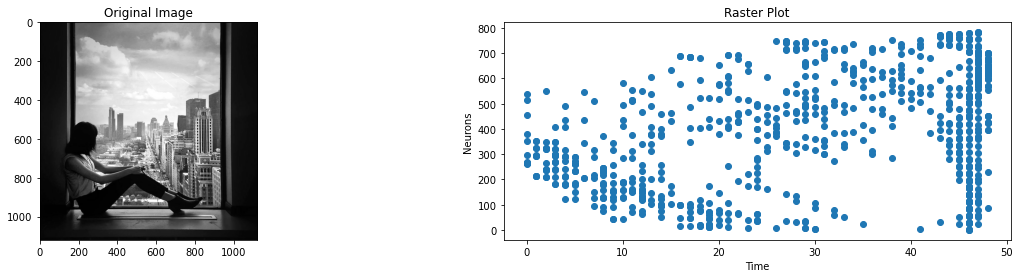

In [34]:
time_window = 50
obj = TimeToFirstSpike(img_path, time_window)
spikes = obj.encode()
obj.raster_plot(spikes)

# TTFS ENCODING FOR MNIST DATASET

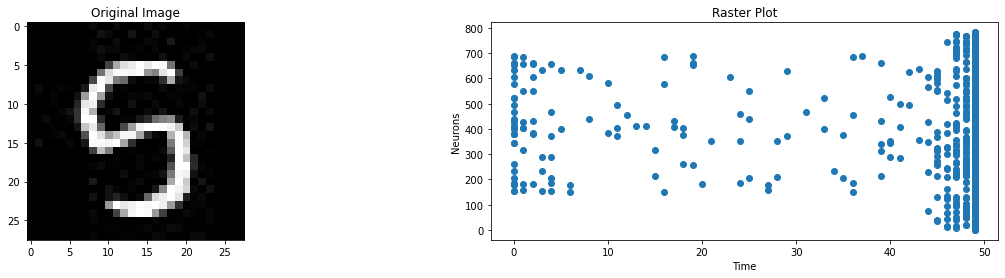

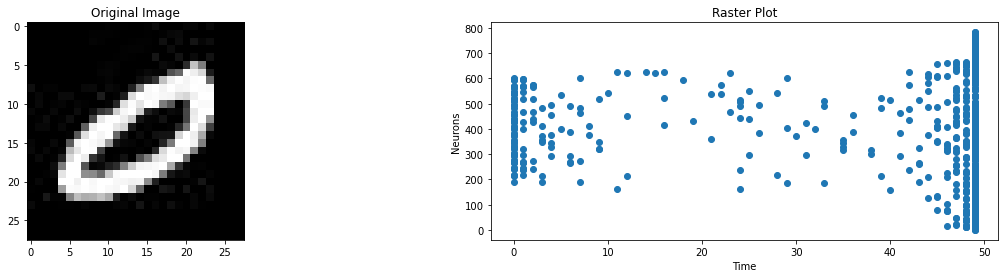

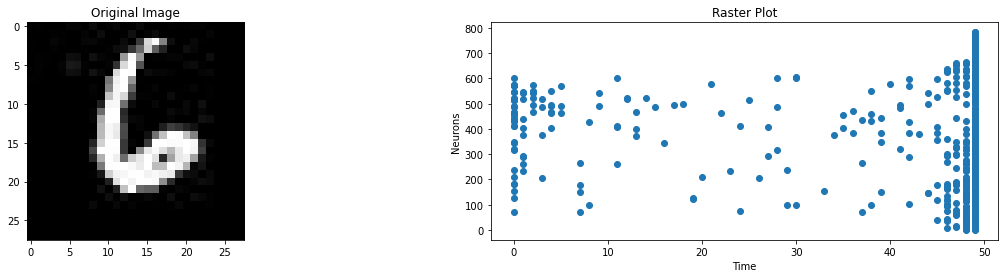

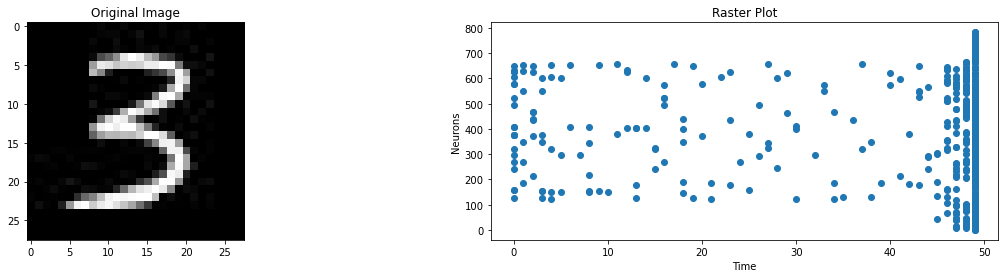

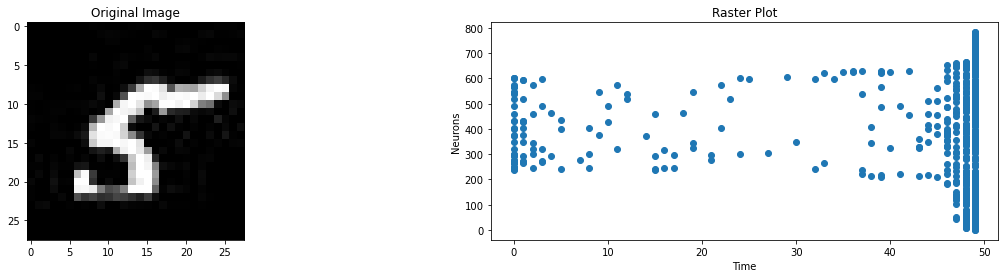

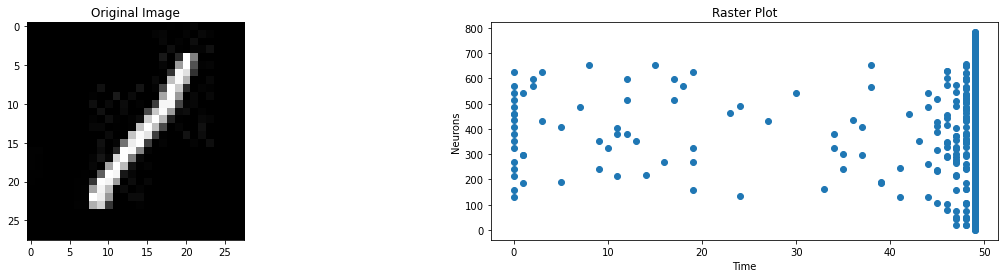

In [5]:
for image_path in os.listdir('mnist/testSample/')[:6]:
    time_window = 50
    obj = TimeToFirstSpike('mnist/testSample/'+image_path, time_window)
    spikes = obj.encode()
    obj.raster_plot(spikes)

# POSITION ENCODING

In [25]:
class RepresentingNumbersEncoding():
    
    def __init__(self,image_path, time_window, neuron_size = 10):
        self.img_path = image_path
        self.img = cv2.imread(self.img_path)
        # self.img = np.zeros((64, 64, 3), dtype = np.uint8)
        # self.img = 255 * self.img
        self.img_show = self.img.copy()
        self.img = cv2.resize(self.img, (28,28))
        self.img = torch.from_numpy(self.img)
        try:
            if self.img.shape[2] == 3:
                self.img = self.img.sum(2)//3
        except: pass
        self.time_window = time_window
        self.neuron_size = neuron_size
    
    def encode(self):
        
        self.img = self.img / 255
        self.spikes = torch.zeros(self.neuron_size, self.time_window)
        for i in range(self.neuron_size):
            mu = ((i+1) * self.neuron_size) / (self.time_window * 2.)
            sig = 0.5
            gauss_img = (1./(sig*np.sqrt(2*np.pi))) * np.exp(((-0.5)*((self.img-mu/sig )** 2)))
            gauss_img = gauss_img * (self.time_window) * 1.2
            gauss_img = gauss_img.to(torch.int32)
            gauss_img_unique = torch.unique(gauss_img.view(gauss_img.shape[0] * gauss_img.shape[1]))
            self.spikes[i][gauss_img_unique] = 1
        
    
    def raster_plot(self) :
        
        plt.imshow(self.img_show)
        plt.title('Original Image')
        plt.figure(figsize=(20,8))
        plt.scatter(torch.nonzero(self.spikes, as_tuple=True)[1], torch.nonzero(self.spikes, as_tuple=True)[0])
        plt.xlabel("Time")
        plt.ylabel("Neurons")
        plt.title('Raster Plot')
        plt.xlim(-1,self.time_window)
        plt.show()
        
        # fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,4))
        # ax1.imshow(self.img_show)
        # ax1.set_title('Original Image')
        # ax2.scatter(torch.nonzero(self.spikes, as_tuple=True)[1], torch.nonzero(self.spikes, as_tuple=True)[0])
        # ax2.set(xlabel='Time', ylabel='Neurons')
        # plt.xlim(-1,self.time_window)
        # ax2.set_title('Raster Plot')
            

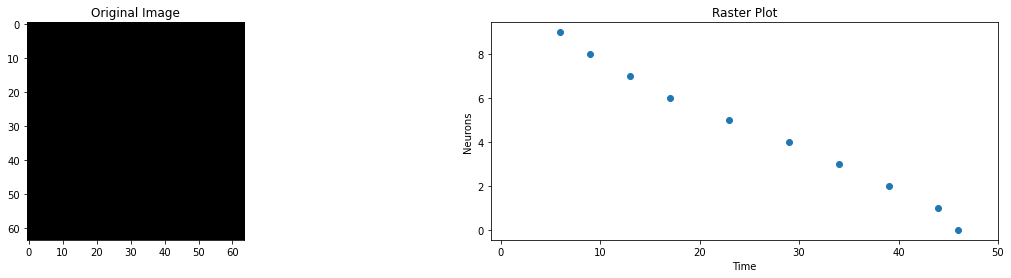

In [18]:
obj = RepresentingNumbersEncoding(img_path, 50, 10)
obj.encode()
obj.raster_plot()

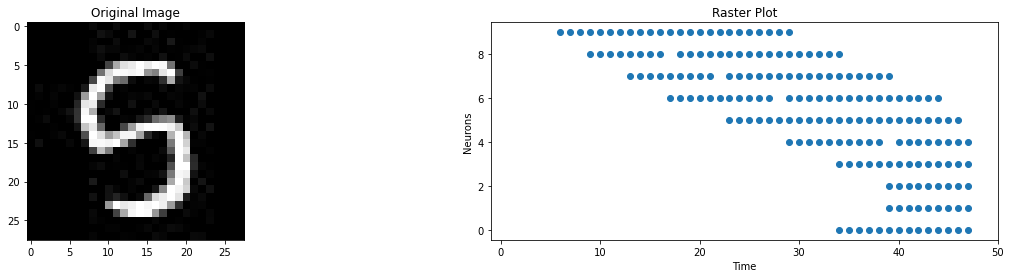

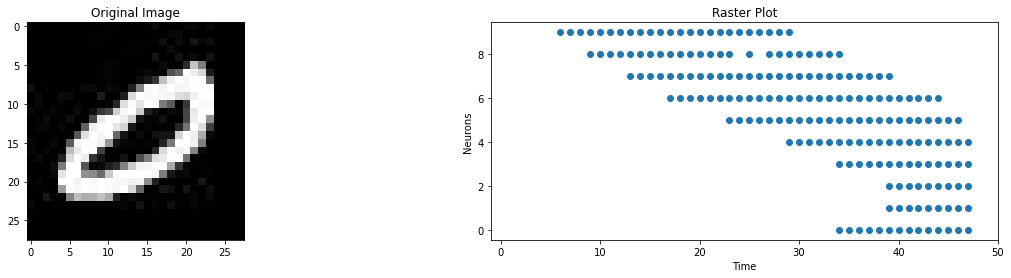

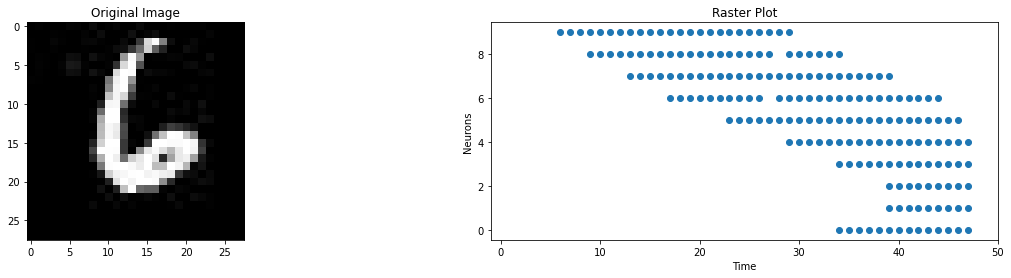

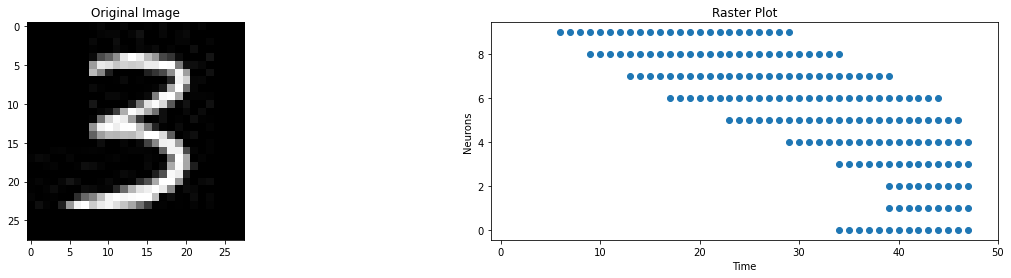

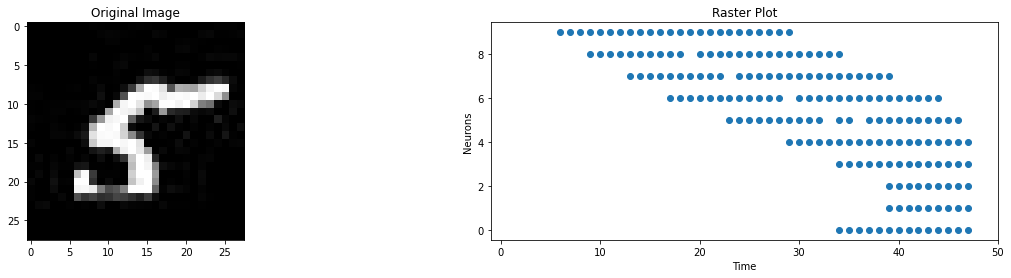

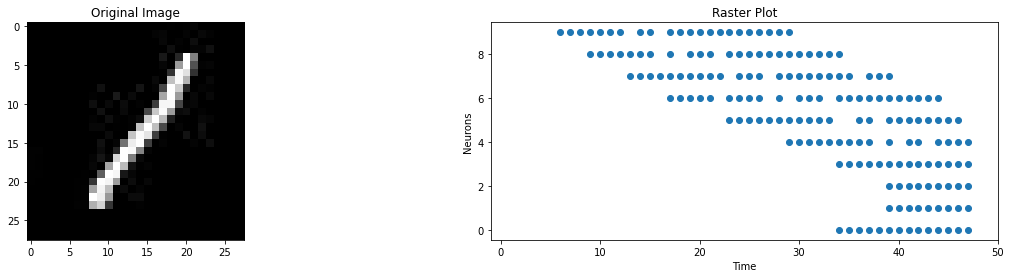

In [12]:
for path in os.listdir('mnist/testSample/')[:6]:
    time_window = 50
    obj = RepresentingNumbersEncoding('mnist/testSample/'+path, 50, 10)
    obj.encode()
    obj.raster_plot()

In [28]:
img_path2 = 'mnist/bnw.png'

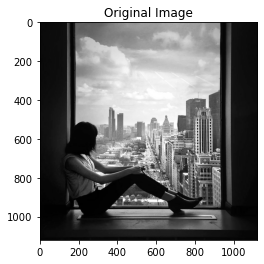

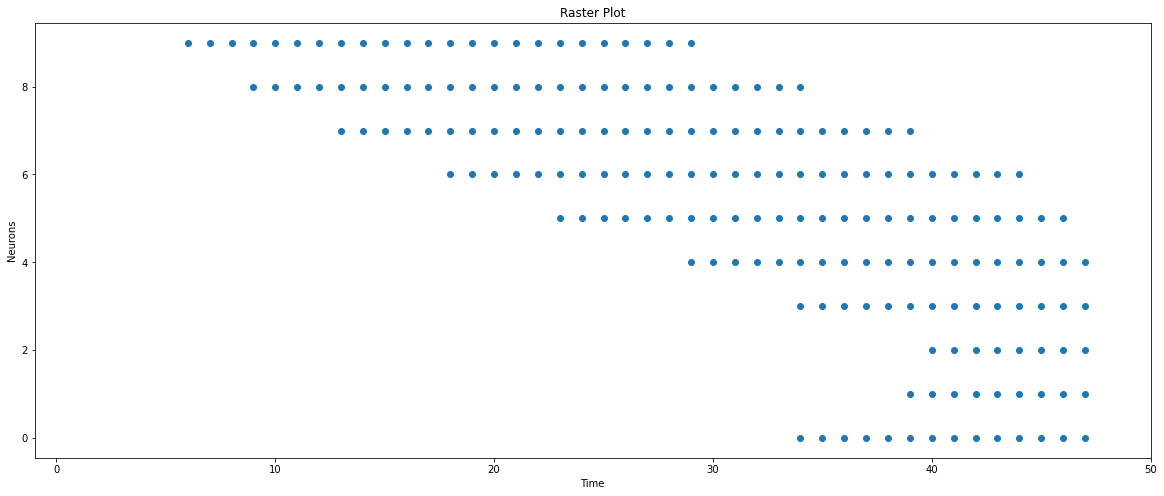

In [31]:
obj = RepresentingNumbersEncoding(img_path2, 50, 10)
obj.encode()
obj.raster_plot()